In [1]:
"""
This notebook can be used to perform a bell test and calculate the S value using all 4 output ports 
"""
import sys
sys.path.insert(0, '../')

import numpy as np
from src.time_tagger import TimeTaggerController, TT_Simulator, two_particle_states
from src.kinetic_mount_controller import KineticMountControl
from src.osc import OSCCommunicator
import matplotlib.pyplot as plt
import time
import asyncio

# Setup SPCMs

In [2]:
# Init the Time Tagger and the Kinetic Mount Controller
TTC = TimeTaggerController()

# NOTE Look at the trace, sucessively block each port and assign the channels numbers in the next cell
# NOTE afterwards stop and close the graphic
#TTC.displayCountTraces()

In [3]:
# set alice channels
TTC.set_alice_reflection_channel(4)
TTC.set_alice_transmission_channel(3)
# set bob channels
TTC.set_bob_reflection_channel(2)
TTC.set_bob_transmission_channel(1)

# NOTE Verify that each trace is correctly labelled and then stop and close the graphic again
#TTC.displayCountTraces()

In [4]:
#KMC.rotate_simulataneously(0,0)

In [5]:
#KMC.rotate_simulataneously(0, 22.5)

In [6]:
#TTC.displayCoincidenceTraces(coincidence_window_SI=0.5e-9)

# Setup Kinetic Mounts

In [7]:
# only run if not already created
if 'KMC' not in globals():  
    KMC = KineticMountControl(number_of_devices=3)

# connect KMC and TTC
TTC.setKineticMountController(KMC)


ASSIGNING CONTROLLERS
---------------------------------------------------------------
Ports Found: ['COM8', 'COM9', 'COM14']
---------------------------------------------------------------
Device succesfully connected (Rotation Mount)
Device succesfully connected (Dual-Position Slider)
Device succesfully connected (Rotation Mount)


In [8]:
# set bob home offset
KMC.bob.set_home_offset(-43 % 360)
KMC.bob.home()
# set alice home offset
KMC.alice.set_home_offset(6)
KMC.alice.home()
# make sure shutter is open
KMC.shutter.open()

2

## Delay Adjustment

In [9]:
#TTC.performDelayAdjustment()


# Setup Simulator

In [10]:
TTSimulator = TT_Simulator(two_particle_states['phi_plus'], initial_state_noise=0.0, debug=True)
# convert from light angle to filter angle and from radians to degrees
CHSH_angles = TTSimulator.CHSH_angles_for_filters
print(f"CHSH_angles: {CHSH_angles}")


TIME-TAGGER SIMULATOR
---------------------------------------------------------------
Initialising . . .

For the initial state:
Matrix([[sqrt(2)/2], [0], [0], [sqrt(2)/2]])

The correlation function has the form:
cos(2*theta_a - 2*theta_b)

We find the following optimal CHSH angles (in multiples of pi):
a0:	0.0000, a1:	-0.2500
b0:	-0.1250, b1:	0.1250

And measurements taken at this angle will produce as CHSH value S of
S = 2.8284 ( 100% of S_bell )

---------------------------------------------------------------
CHSH_angles: [  0.         -22.49882581 -11.24825903  11.25018533]


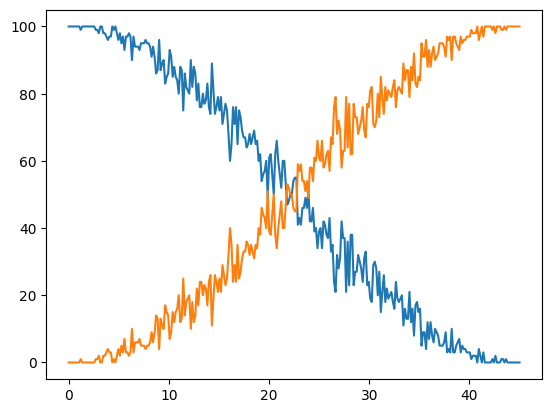

In [11]:
angles = np.linspace(0, 45, 300)
LSame = []
LMixed = []
for a in angles:
    data = TTSimulator.measure_n_entangled_pairs_filter_angles(100, theta_a=a, theta_b=0)
    LSame.append(data[0] + data[3])
    LMixed.append(data[1] + data[2])

plt.plot(angles, LSame) 
plt.plot(angles, LMixed)

In [15]:
# angles are given as [a, A, b, B]
maxContrastAngles = [0, 45, 0, 45]
idealAngles = [0, -22.5, -11.25, 11.25] # for triplett |HH> + |VV> initial state
TTC.measureS(CHSH_angles=idealAngles, integration_time_per_basis_setting_SI=4, TTSimulator=None, coincidence_window_SI=0.5e-9)


corr[a,b] = 0.9328247510065691
	N[|T,T>]=4947
	N[|T,R>]=63
	N[|R,T>]=254
	N[|R,R>]=4174

corr[a,B] = 0.5942099501277217
	N[|T,T>]=3552
	N[|T,R>]=273
	N[|R,T>]=1395
	N[|R,R>]=3001

corr[A,b] = 0.375
	N[|T,T>]=2808
	N[|T,R>]=459
	N[|R,T>]=1856
	N[|R,R>]=2285

corr[A,B] = -0.48172217709179527
	N[|T,T>]=929
	N[|T,R>]=822
	N[|R,T>]=3738
	N[|R,R>]=666

S = abs(corrs[0,0] + corrs[0,1] + corrs[1,0] - corrs[1,1]) = 2.383756878226086


In [13]:
TTC.measureS(CHSH_angles=maxContrastAngles, integration_time_per_basis_setting_SI=2, TTSimulator=TTSimulator)



corr[a,b] = 1.0
	N[|T,T>]=2505
	N[|T,R>]=0
	N[|R,T>]=0
	N[|R,R>]=2495

corr[a,B] = -1.0
	N[|T,T>]=0
	N[|T,R>]=2555
	N[|R,T>]=2445
	N[|R,R>]=0

corr[A,b] = -1.0
	N[|T,T>]=0
	N[|T,R>]=2465
	N[|R,T>]=2535
	N[|R,R>]=0

corr[A,B] = 1.0
	N[|T,T>]=2487
	N[|T,R>]=0
	N[|R,T>]=0
	N[|R,R>]=2513

S = abs(corrs[0,0] + corrs[0,1] + corrs[1,0] - corrs[1,1]) = 2.0


In [14]:
TTC.measure_S_with_two_ports(CHSH_angles=idealAngles, integration_time_per_basis_setting_SI=2, TTSimulator=None, coincidence_window_SI=0.5e-9)

SPCM Pairs: ['TT', 'TR', 'RT', 'RR']

corr[a,b] = [ 0.912 -0.86  -0.877  0.871]
	N[a , b ]=[2444   38  103 1967]
	N[a , b']=[ 136  453 1852  140]
	N[a', b ]=[  73  447 1959  125]
	N[a', b']=[2113   30  146 1874]

corr[a,B] = [ 0.341 -0.397 -0.347  0.339]
	N[a , B ]=[1845  131  676 1493]
	N[a , B']=[ 760  309 1263  743]
	N[a', B ]=[ 806  328 1534  611]
	N[a', B']=[1341  144  679 1252]

corr[A,b] = [ 0.153 -0.048 -0.157  0.095]
	N[A , b ]=[1450  265  886 1139]
	N[A , b']=[ 927  270 1193  874]
	N[A', b ]=[1108  246 1171  984]
	N[A', b']=[1320  204  835 1111]

corr[A,B] = [-0.687  0.615  0.767 -0.66 ]
	N[A , B ]=[ 424  403 1924  355]
	N[A , B']=[1918  100  257 1609]
	N[A', B ]=[2029   86  222 1842]
	N[A', B']=[ 308  378 1707  352]

S = abs(corrs[0,0] + corrs[0,1] + corrs[1,0] - corrs[1,1]) = TT, TR, RT, RR : [2.09328281 1.91945476 2.14895752 1.96562789]
